# Намуудын талаарх жиргээнүүд?

Twitter API ашиглан МАН АН гэсэн түлхүүр үгээр хайлт хийж тэрхүү датан дээр ChatGPT API ашиглан sentiment анализ хийв. 
LLModel нь өгүүлбэр тус бүрээр оноо өгөөд (-1, 1 хооронд) нийлбэрээр нь classification хийдэг болохоор монголоос англи хэлрүү орчуулсан текстэн дээр нилээд алдаж байна. Жишээ нь "АН байгаач МАН ялна" гэсэн жиргээг эерэг жиргээ гэхэд хэцүү юм. Гэхдээ нийж 136 жиргээг ерөнхийд нь үзвэл бас ч баримжаатай байна. 
Графикийн доор ашигласан пайтон код мөн хүмүүсийн жиргээнүүдийг хамгийн доод талд орууллаа. Бүрэн кодыг өмнөх постноос үзэж болно.
Жишээ нь:
## Сөрөг жиргээ

- Author: DoodleMN 
- Tweet: @Bayaraa0218 Цахим хувьсгал хийсэн Монголын Ерөнхий сайд бол Сайханбилэг ба АН-ын Засгийн газар! Данх Оюук улсын мөнгө хулгайлахаас өөр юу ч хийгээгүй! ТҮЦ машины лавлагаануудыг анх Сайханбилэг нэвтрүүлж, e-mongolia-г анх нэвтрүүлсэн! МАН мафи хулгайчид данх Оюук нүдээ цавчихгүй худад хэлдэг!  
- Sentiment: negative
---
## Эерэг жиргээ
- Author: GantsUnen 
- Tweet: @budragchaaser Нямбаатар зоригтой шийдэмгий ажиллаж бна.МАН сонгоё доо.АН бол нялцагнаад хүний эрх гэж солиороод бүр таг зогсоож түгжирнэ!  
- Sentiment: positive

---  
## Neutral жиргээ
- Author: ard_mn 
- Tweet: @TomyoBodyo Аав, ээж, ах, дүүс гээд бүгд нэг атганд орж байна гэдэг сонин л юм. Би ээжтэй яриад ман, аавтай яриад ан байдаг, дал гарсан хөгшчүүл шүү.  
- Sentiment: neutral

![lakehouse](../images/man_an.png)

## Код болон жиргээ тус бүр дээр хэрхан таамаг хийснийг харна уу?

In [1]:
from requests_oauthlib import OAuth1Session
import json
import pandas as pd
import datetime
import sqlite3
import time
from sqlalchemy import create_engine
import openai
import os

In [2]:
current_dir = os.getcwd()
chatgpt_cred = os.path.join(current_dir, "config.json")
log_file = os.path.join(current_dir, "script_log.txt")
cred_file = os.path.join(current_dir, "twitter_credentials.json")
db_path = os.path.join(current_dir, "tweets.sqlite")
output_file = os.path.join(current_dir, "new.csv")
daily = os.path.join(current_dir, "daily_tweets_from_ai.csv")
image_input_file = os.path.join(current_dir, "canva.png")
image_output_file = os.path.join(current_dir, "post.jpg")


engine = create_engine(f'sqlite:///{db_path}')
now = datetime.datetime.now()
now.strftime('%Y-%m-%d-%H-%M')


# Load the API key from a JSON file
with open(chatgpt_cred , 'r') as file:
    config = json.load(file)
    api_key = config['openai_api_key']

openai.api_key = str(api_key)

# Functions

In [5]:
sql_query = '''
WITH RankedTweets AS (
    SELECT
        author_id,
        tweet_id,
        text,
        created_at,
        username,
        sentiment,
        ROW_NUMBER() OVER (PARTITION BY author_id ORDER BY created_at) as rank
    FROM mongol
)
SELECT
        author_id,
        tweet_id,
        text,
        created_at,
        username,
        sentiment
FROM RankedTweets
WHERE rank = 1
'''

df= pd.read_sql_query(sql_query, engine)
# Assuming df is your DataFrame
end = df.shape[0]
print(f"Total tweets: {end}")
df

Total tweets: 133


,author_id,tweet_id,text,created_at,username,sentiment
0,100446141,1757967578096644553,"@TomyoBodyo Аав, ээж, ах, дүүс гээд бүгд нэг а...",2024-02-15T03:18:26.000Z,ard_mn,neutral
1,1039086266,1756337033034043716,@batdorj911 @Chuluunbat201 @Temuujin_Kh @Uyang...,2024-02-10T15:19:14.000Z,ebomandakh,neutral
2,105260958,1754916419731415324,@khbobunaguai Амаргүй гэж үг бхгүй Хэцүү гдг ү...,2024-02-06T17:14:13.000Z,BeKool55,negative
3,1087693168437415937,1757782161812525364,@khotgoid81 Орос нохой Женкогын АН аа дэмжинэ\...,2024-02-14T15:01:40.000Z,OCHIROO51970872,negative
4,1087771890,1757632914274288055,"С.Эрдэнэ: АН-ын ялагдлыг ""Женко"" МАН-тай хамта...",2024-02-14T05:08:36.000Z,Dorgiomn,negative
...,...,...,...,...,...,...
128,967914257202335744,1757740077231575467,@Uyanga_ts АН-н гайгүй гэсэн болгоныг МАН-гару...,2024-02-14T12:14:26.000Z,tserendash_1,negative
129,97402990,1757618611080855798,"С.Эрдэнэ: АН-ын ялагдлыг ""Женко"" МАН-тай хамта...",2024-02-14T04:11:46.000Z,sonin_mn,negative
130,983001520051335168,1756359514369212835,МАН-ын ЕНБД Амарбаясгалан андын зурж буй зураг...,2024-02-10T16:48:34.000Z,OtgooJadamba,negative
131,985889737,1757704133941907637,"С.Эрдэнэ: АН-ын ялагдлыг ""Женко"" МАН-тай хамта...",2024-02-14T09:51:36.000Z,A_Erdenepurev,negative


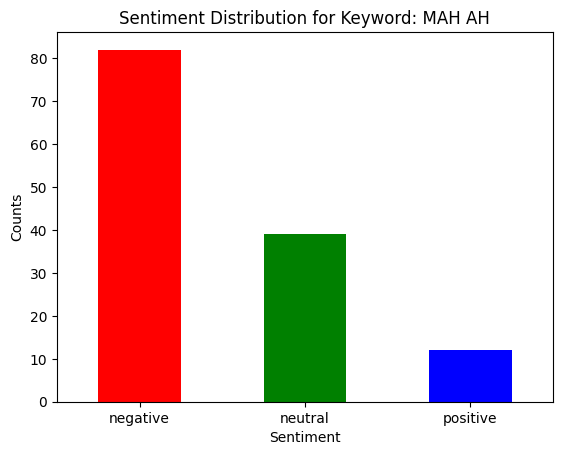

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

keyword = "МАН АН"
def plot_sentiment_bar_chart(df, sentiment_column):
    """
    Plots a bar chart of sentiment distribution.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the sentiment data.
    sentiment_column (str): The name of the column in df that contains sentiment values.
    """
    # Count the occurrences of each sentiment
    sentiment_counts = df[sentiment_column].value_counts()

    # Plotting
    sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
    plt.title(f'Sentiment Distribution for Keyword: {keyword}')
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    plt.xticks(rotation=0)  # Rotate x-labels for better readability
    plt.show()
    
plot_sentiment_bar_chart(df, 'sentiment')

In [13]:
def printInColor(df):
    # ANSI escape codes for some colors
        RED = '\033[31m'   # Red Text
        GREEN = '\033[32m' # Green Text
        BLUE = '\033[34m'  # Blue Text
        RESET = '\033[0m'  # Reset to default color

        for i in range(0, df.shape[0]):
#             if df.sentiment[i] =='positive':
            print(f'''
            - {GREEN}Author{RESET}: {df.username[i]} 
            - {BLUE}Tweet{RESET}: {df.text[i]}  
            - {RED}Sentiment{RESET}: {df.sentiment[i]}

            ---

            ''')

In [14]:
printInColor(df)


            - Author: ard_mn 
            - Tweet: @TomyoBodyo Аав, ээж, ах, дүүс гээд бүгд нэг атганд орж байна гэдэг сонин л юм. Би ээжтэй яриад ман, аавтай яриад ан байдаг, дал гарсан хөгшчүүл шүү.  
            - Sentiment: neutral

            ---

            

            - Author: ebomandakh 
            - Tweet: @batdorj911 @Chuluunbat201 @Temuujin_Kh @Uyanga_ts @erintulgatmn @Enkhsaikhan_PM @E_BatUul 1т жонхуу гэдэг нь намын гишүүнчлэлээ сэргээцийм уу? АН олонхийн саналаа дагдаг болохоос МАН, ХҮН шиг нэг нь шийдээд шийдвэрийг нь дагаад явчдаггүй байх оо, өнөөдрийн МАН хамгийн их эрх мэдэлтэй ерөнхий сайд бий болгоход гардан туслагч нь ХҮН биздээ  
            - Sentiment: neutral

            ---

            

            - Author: BeKool55 
            - Tweet: @khbobunaguai Амаргүй гэж үг бхгүй Хэцүү гдг үг бий. Улстөрчдийн усан толгойноос гарсан мангар үг. Hard гхийн оронд not easy гхтэй адил. Амаргүй ажил гэж бхгүй гхээр хэцүү ажил гэж бхгүй гсн утга илэрхийлэнэ. Амар а